In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.patches as mpatches
labels=['Normal','Fraud']

In [2]:
data=pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
features=[feature for feature in data.columns if feature not in ['Class']]
target="Class"
x=data[features]
y=data[target]

In [5]:
x.shape,y.shape

((284807, 30), (284807,))

In [6]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

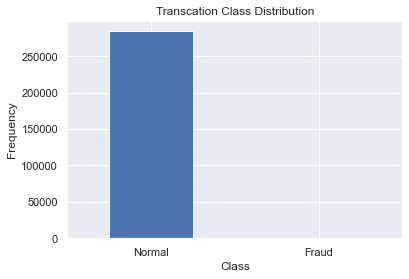

In [7]:
count_class=y.value_counts()
count_class.plot(kind='bar',rot=0)
plt.title('Transcation Class Distribution')
plt.xticks(range(2),labels)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [8]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [9]:
fraud.shape,normal.shape,

((492, 31), (284315, 31))

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


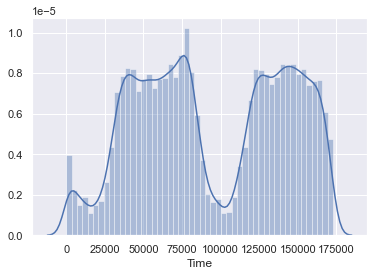

In [11]:
sns.distplot(data['Time'])

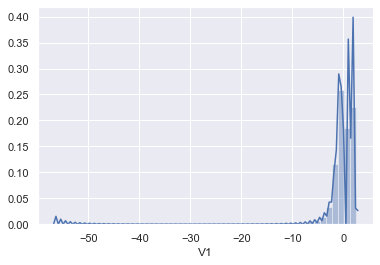

In [12]:
sns.distplot(data['V1'])

In [13]:
lab=['Normal',"Fraud"]

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


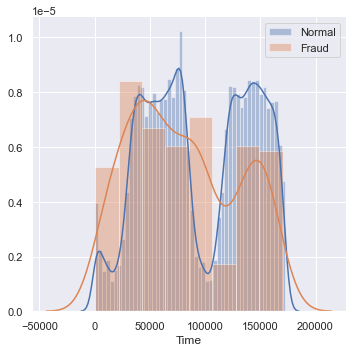

In [14]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'Time')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


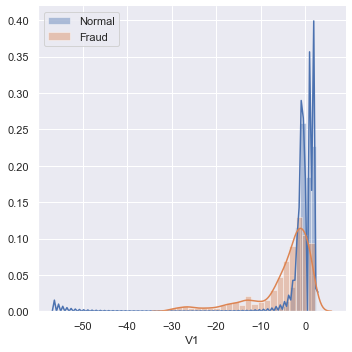

In [15]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V1')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


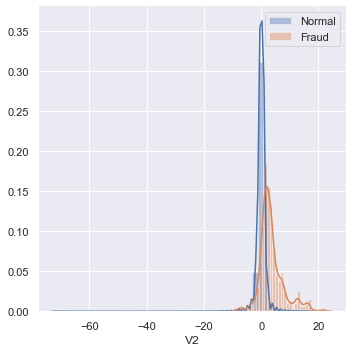

In [16]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V2')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


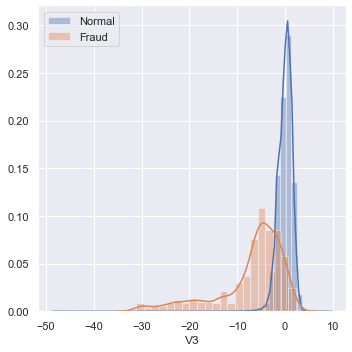

In [17]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V3')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


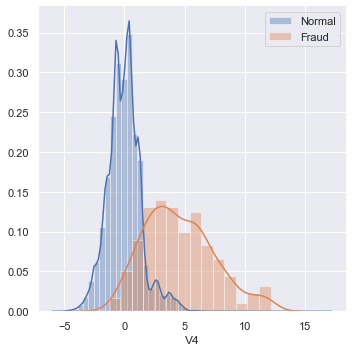

In [18]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V4')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


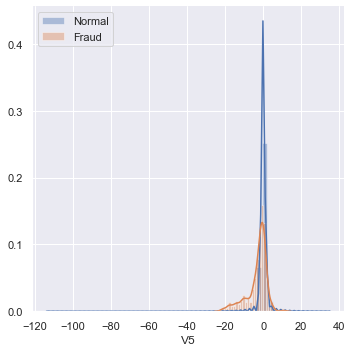

In [19]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V5')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


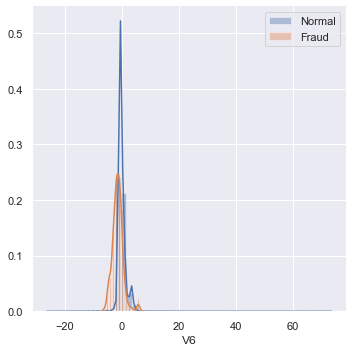

In [20]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V6')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


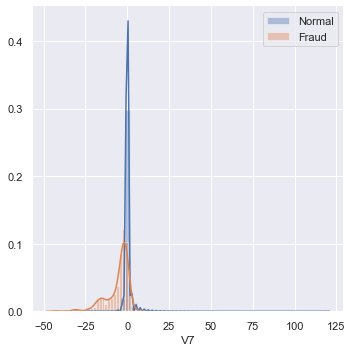

In [21]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V7')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


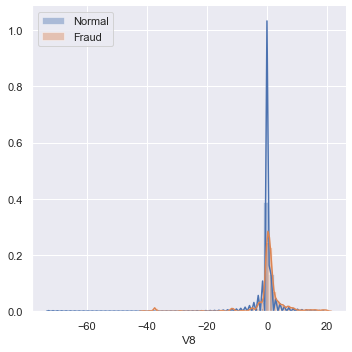

In [22]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V8')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


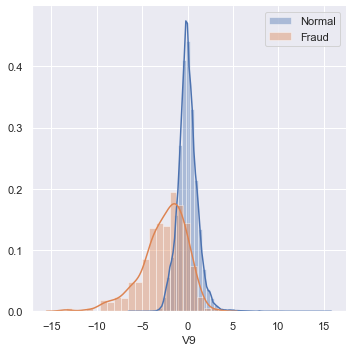

In [23]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V9')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


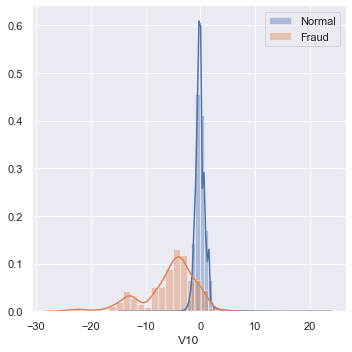

In [24]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V10')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


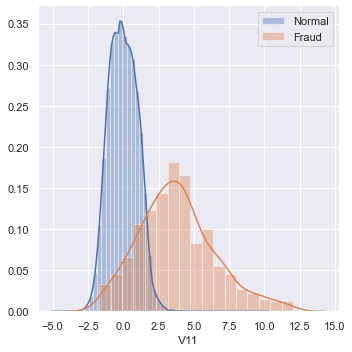

In [25]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V11')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


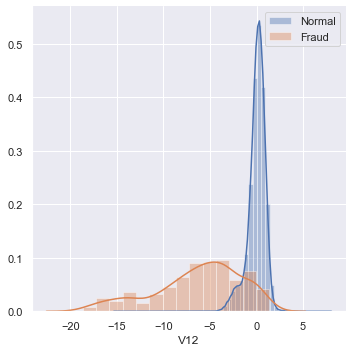

In [26]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V12')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


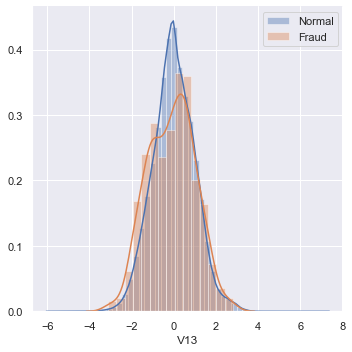

In [27]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V13')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


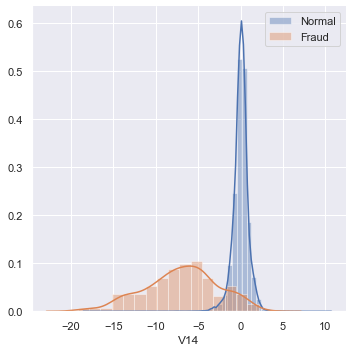

In [28]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V14')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


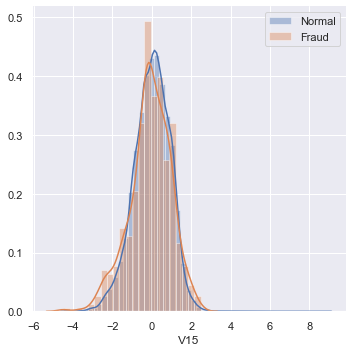

In [29]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V15')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


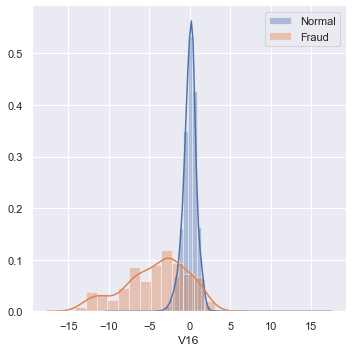

In [30]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V16')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


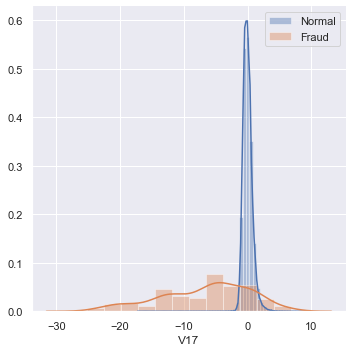

In [31]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V17')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


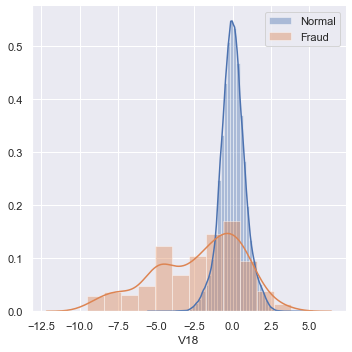

In [32]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V18')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


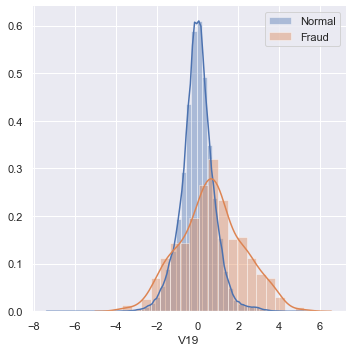

In [33]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V19')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


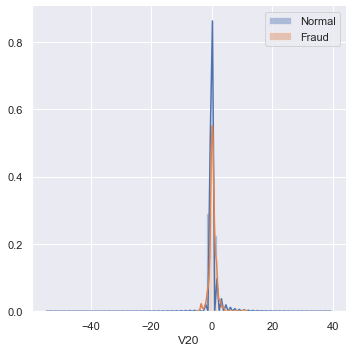

In [34]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V20')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


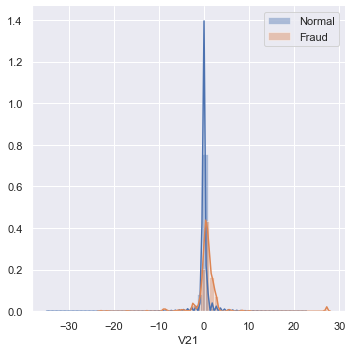

In [35]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V21')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


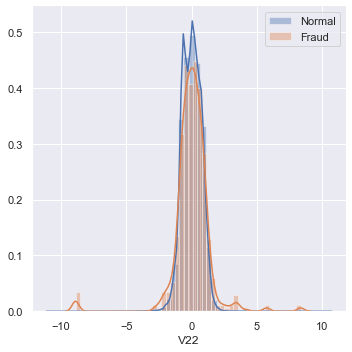

In [36]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V22')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


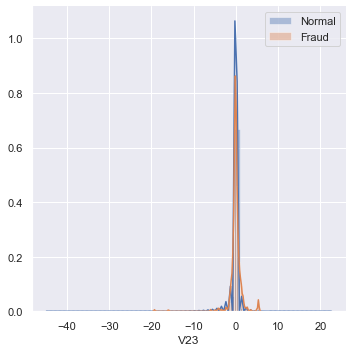

In [37]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V23')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


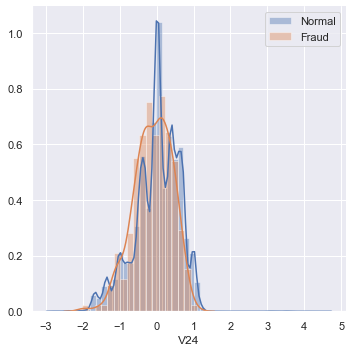

In [38]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V24')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


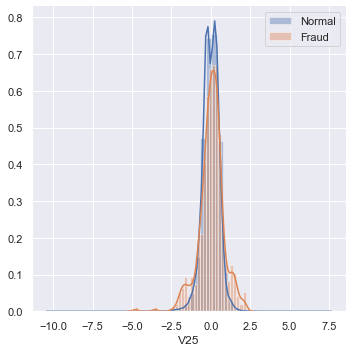

In [39]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V25')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


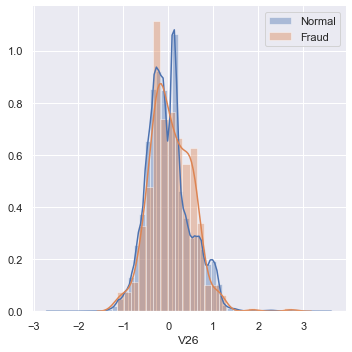

In [40]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V26')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


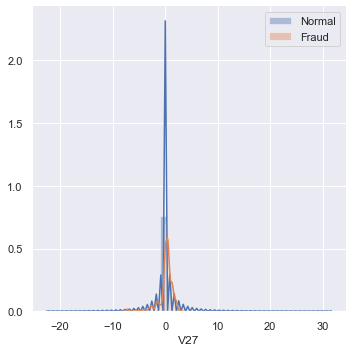

In [41]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V27')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


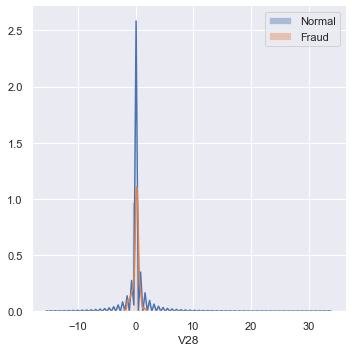

In [42]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'V28')
plt.legend(lab)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


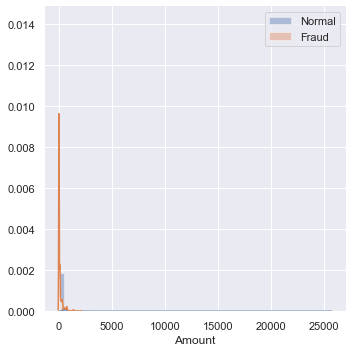

In [43]:
sns.FacetGrid(data,hue='Class',size=5).map(sns.distplot,'Amount')
plt.legend(lab)

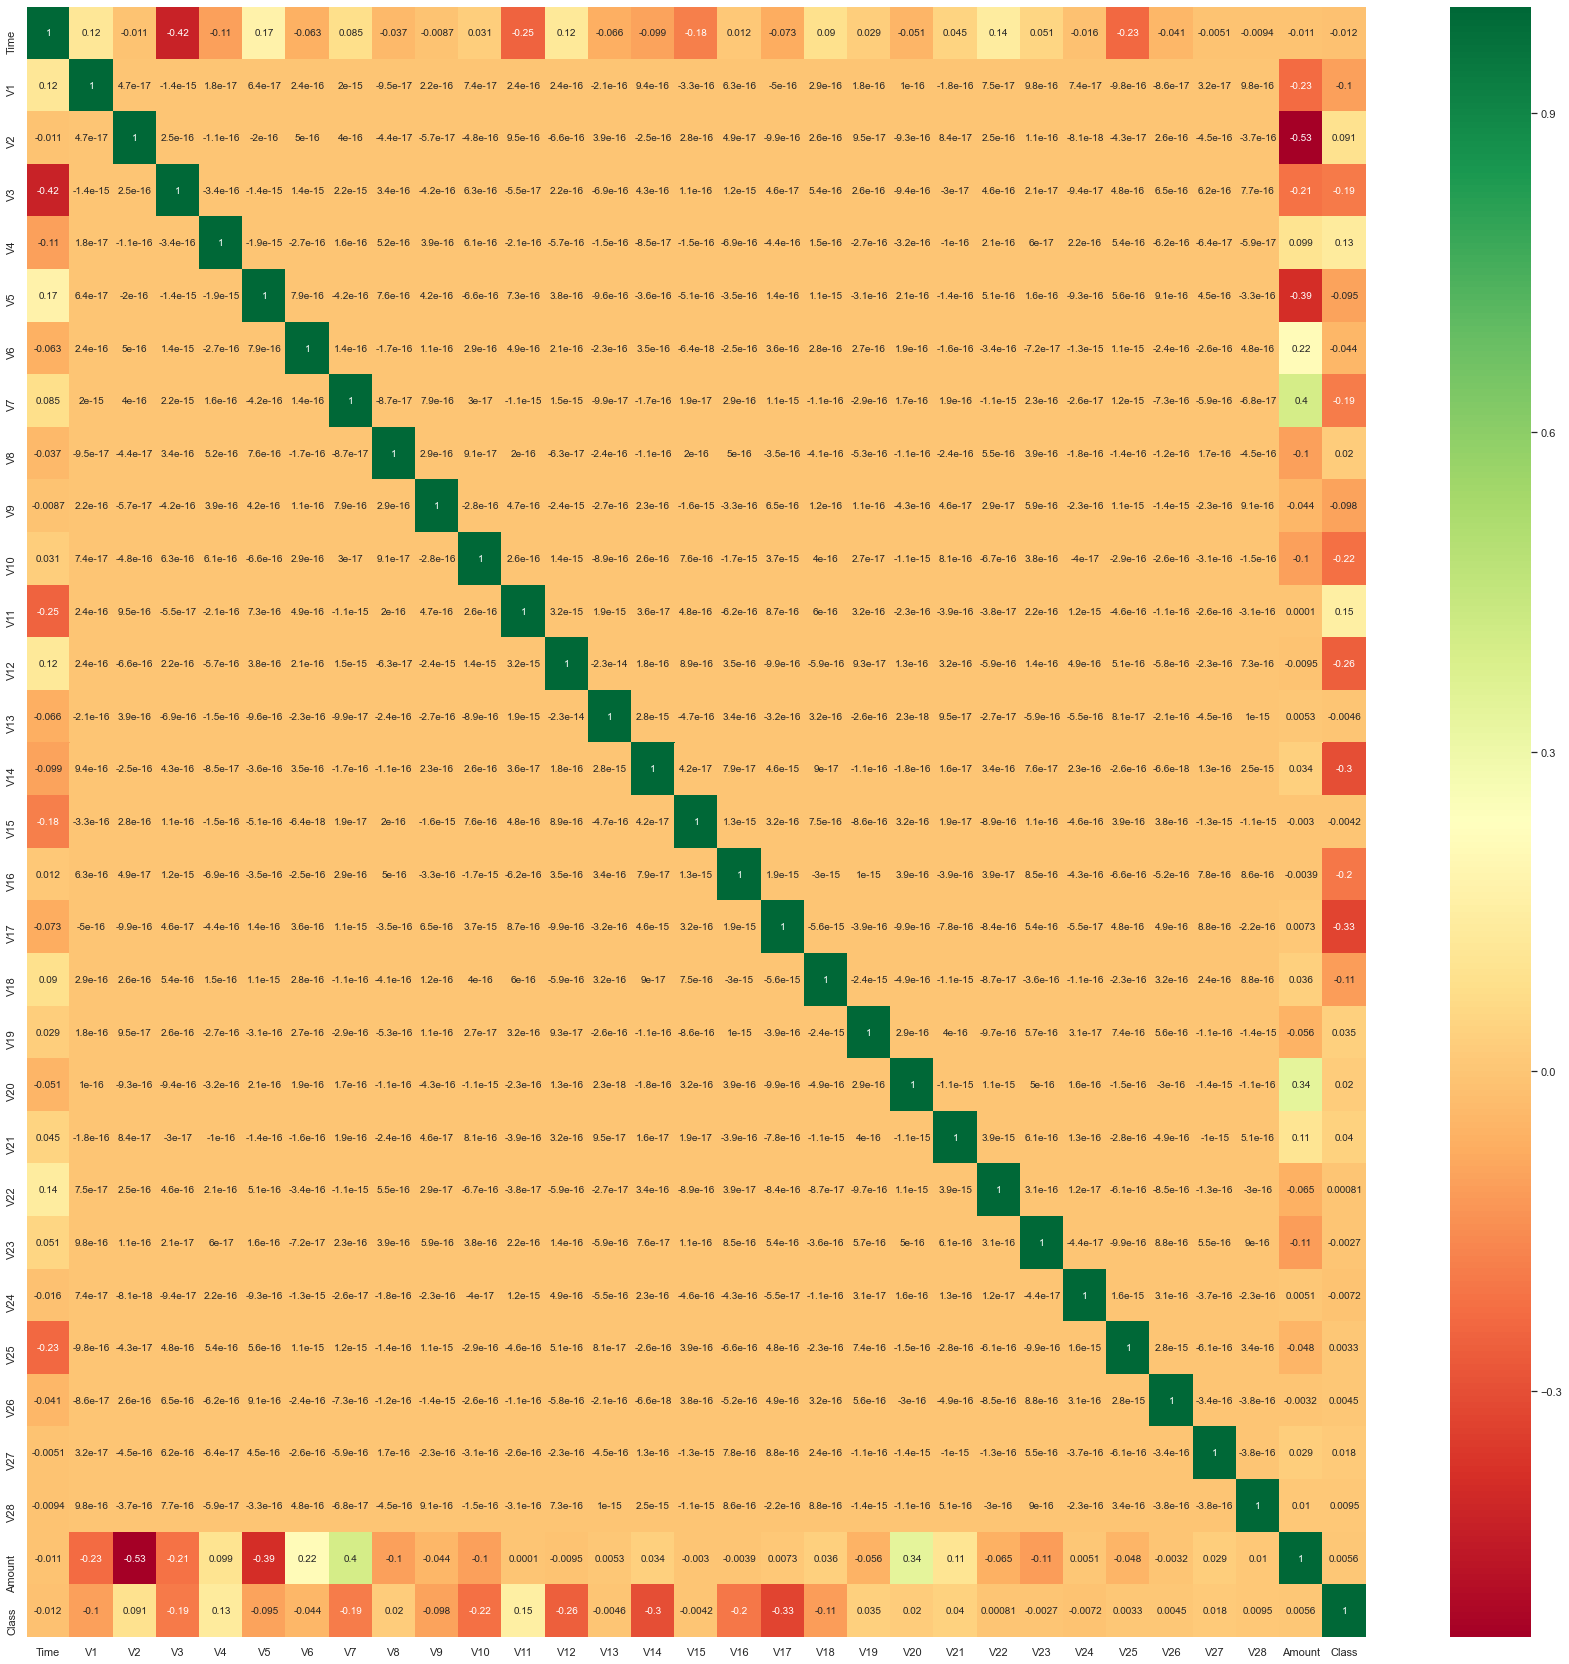

In [44]:
corrmat=data.corr()
corrmat_features=corrmat.index
plt.figure(figsize=(30,30))

g=sns.heatmap(data[corrmat_features].corr(),annot=True,cmap='RdYlGn')

In [45]:
from imblearn.over_sampling import RandomOverSampler

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
os =  RandomOverSampler(ratio=1)

In [47]:
x_train, y_train = os.fit_sample(x, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
x_train.shape,y_train.shape

((568630, 30), (568630,))

In [49]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier(n_estimators = 50, criterion='entropy',random_state = 0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
y_pred=classifier.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,classification_report

In [74]:
from sklearn.metrics import confusion_matrix

In [81]:
cm=confusion_matrix(y_test,y_pred)

In [82]:
print(cm)

[[29103     2]
 [    0 29123]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29105
           1       1.00      1.00      1.00     29123

    accuracy                           1.00     58228
   macro avg       1.00      1.00      1.00     58228
weighted avg       1.00      1.00      1.00     58228



In [84]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (y_pred != y_test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9999656522635159
The precision is 0.999931330472103
The recall is 1.0
The F1-Score is 0.9999656640571349
The Matthews correlation coefficient is0.9999313068783807
